# Exploratory Data Analysis (EDA) sul dataset dell'Obesità
## 1)  DATA LOADING & CLEANING
Lo scopo della prima sezione è quello di effettuare una pulizia sui dati presenti nel dataset una volta caricati
### 1.1) Data Loading
Il primo passo consiste nell'importazione delle librerie necessarie al corretto funzionamento del codice

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

Partiamo adesso caricando il dataset e mostrando le prime righe:

In [2]:
dataset = pd.read_csv("Obesity.csv")
display(dataset.head())

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

Mostriamo per ogni variabile presente il suo nome e le suddividiamo in base alla loro tipologia

In [3]:
display(dataset.dtypes)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [4]:
var_numeriche = dataset.select_dtypes(include=["float64"]).columns
var_categoriche = dataset.select_dtypes(exclude=["float64"]).columns
print("\033[1m" + f"\n Variabili numeriche: {list(var_numeriche)} \n")
print("\033[1m" + f"\n Variabili categoriche: {list(var_categoriche)} \n")


 Variabili numeriche: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'] 


 Variabili categoriche: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'] 



Possiamo ulteriormente suddividere le variabili categoriche in **Nominali** e **Ordinali**: <br><br>
**NOMINALI**
1. Gender (Male/Female)

2. family_history_with_overweight (yes/no)

3. FAVC (yes/no)

4. SMOKE (yes/no)

5. SCC (yes/no)

6. MTRANS (Public_Transportation, Automobile, Walking, Motorbike, Bike) <br><br>

**ORDINALI**

1. CAEC (no, Sometimes, Frequently, Always)

2. CALC (no, Sometimes, Frequently, Always)

3. NObeyesdad (Insufficient_Weight, Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II, Obesity_Type_III) (**Variabile Target**)

### 1.2) Dimensioni del dataset
Ora visualizziamo il numero di osservazioni e di variabili presenti:

In [5]:
print("\033[1m" + f"\n Il dataset contiene {dataset.shape[0]} osservazioni e {dataset.shape[1]} variabili.\n")


 Il dataset contiene 2114 osservazioni e 17 variabili.



Per praticità, abbiamo preferito rinominare alcune delle variabili, in modo tale da facilitare le operazioni

In [6]:
dataset.rename(columns={"FAVC": "High_Caloric_Food", 
                        "FCVC": "Vegetable_Consumption", 
                        "NCP": "Main_Meals_Per_Day", 
                        "CAEC": "Food_Between_Meals", 
                        "CH2O": "Water_Intake", 
                        "SCC": "Calorie_Monitoring", 
                        "FAF": "Physical_Activity_Frequency", 
                        "TUE": "Tech_use_Time", 
                        "CALC": "Alcohol_Consumption", 
                        "MTRANS": "Transport_Mode", 
                        "NObeyesdad": "Obesity_Level",}, inplace=True)

var_numeriche = dataset.select_dtypes(include=["float64"]).columns
var_categoriche = dataset.select_dtypes(exclude=["float64"]).columns

print("\033[1m" + f"\n Variabili numeriche: {list(var_numeriche)} \n")
print("\033[1m" + f"\n Variabili categoriche: {list(var_categoriche)} \n")


 Variabili numeriche: ['Age', 'Height', 'Weight', 'Vegetable_Consumption', 'Main_Meals_Per_Day', 'Water_Intake', 'Physical_Activity_Frequency', 'Tech_use_Time'] 


 Variabili categoriche: ['Gender', 'family_history_with_overweight', 'High_Caloric_Food', 'Food_Between_Meals', 'SMOKE', 'Calorie_Monitoring', 'Alcohol_Consumption', 'Transport_Mode', 'Obesity_Level'] 



Avendo riscontrato alcune stranezze tra i valori numerici presenti nel dataset, abbiamo effettuato alcune operazioni in modo tale da rendere i dati più veritieri. <br>
Come prima cosa abbiamo fatto in modo che la variabile relativa all'altezza fosse espressa in centimentri e non in metri, per evitare errori di approssimazione. <br>
Dopodiché, abbiamo arrotondato tutti i valori numerici e mostriamo le modifiche apportatate.

In [7]:
dataset["Height"] *= 100
dataset[var_numeriche] = dataset[var_numeriche].round().astype(int)
dataset

Gender  Age  Height  Weight family_history_with_overweight  \
0     Female   21     162      64                            yes   
1     Female   21     152      56                            yes   
2       Male   23     180      77                            yes   
3       Male   27     180      87                             no   
4       Male   22     178      90                             no   
...      ...  ...     ...     ...                            ...   
2109  Female   21     171     131                            yes   
2110  Female   22     175     134                            yes   
2111  Female   23     175     134                            yes   
2112  Female   24     174     133                            yes   
2113  Female   24     174     133                            yes   

     High_Caloric_Food  Vegetable_Consumption  Main_Meals_Per_Day  \
0                   no                      2                   3   
1                   no                      3                   3   
2                   no                      2                   3   
3                   no                      3                   3   
4                   no                      2                   1   
...                ...                    ...                 ...   
2109               yes                      3                   3   
2110               yes                      3                   3   
2111               yes                      3                   3   
2112               yes                      3                   3   
2113               yes                      3                   3   

     Food_Between_Meals SMOKE  Water_Intake Calorie_Monitoring  \
0             Sometimes    no             2                 no   
1             Sometimes   yes             3                yes   
2             Sometimes    no             2                 no   
3             Sometimes    no             2                 no   
4             Sometimes    no             2                 no   
...                 ...   ...           ...                ...   
2109          Sometimes    no             2                 no   
2110          Sometimes    no             2                 no   
2111          Sometimes    no             2                 no   
2112          Sometimes    no             3                 no   
2113          Sometimes    no             3                 no   

      Physical_Activity_Frequency  Tech_use_Time Alcohol_Consumption  \
0                               0              1                  no   
1                               3              0           Sometimes   
2                               2              1          Frequently   
3                               2              0          Frequently   
4                               0              0           Sometimes   
...                           ...            ...                 ...   
2109                            2              1           Sometimes   
2110                            1              1           Sometimes   
2111                            1              1           Sometimes   
2112                            1              1           Sometimes   
2113                            1              1           Sometimes   

             Transport_Mode        Obesity_Level  
0     Public_Transportation        Normal_Weight  
1     Public_Transportation        Normal_Weight  
2     Public_Transportation        Normal_Weight  
3                   Walking   Overweight_Level_I  
4     Public_Transportation  Overweight_Level_II  
...                     ...                  ...  
2109  Public_Transportation     Obesity_Type_III  
2110  Public_Transportation     Obesity_Type_III  
2111  Public_Transportation     Obesity_Type_III  
2112  Public_Transportation     Obesity_Type_III  
2113  Public_Transportation     Obesity_Type_III  

[2114 rows x 17 columns]

### 1.3) Missing Values
Verifichiamo la presenza o meno di valori mancanti all'interno dei dati per ciascuna variabile:

In [8]:
print("\033[1m" + "\nValori Mancanti per ogni variabile\n")
missing_values = dataset.isna().sum()
missing_values


Valori Mancanti per ogni variabile



Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
High_Caloric_Food                 0
Vegetable_Consumption             0
Main_Meals_Per_Day                0
Food_Between_Meals                0
SMOKE                             0
Water_Intake                      0
Calorie_Monitoring                0
Physical_Activity_Frequency       0
Tech_use_Time                     0
Alcohol_Consumption               5
Transport_Mode                    0
Obesity_Level                     1
dtype: int64

In [9]:
missing_values_percent = ((missing_values/len(dataset))*100).round(2)
missing_values_table = pd.DataFrame({"Valori Mancanti": missing_values, "% del totale": missing_values_percent})
display(missing_values_table[missing_values_table["Valori Mancanti"] > 0])

Valori Mancanti  % del totale
Alcohol_Consumption                5          0.24
Obesity_Level                      1          0.05

Possiamo notare che sono presenti 5 valori mancanti relativi al consumo di alcolici e solo 1 valore mancante riferito al livello di obesità. <br>
Vediamo a quale riga corrispondono: 

In [10]:
print("\033[1m" + "\nValori Mancanti riferiti al consumo di alcolici:\n")
dataset[dataset["Alcohol_Consumption"].isna()] 


Valori Mancanti riferiti al consumo di alcolici:



Gender  Age  Height  Weight family_history_with_overweight  \
13     Male   41     180      99                             no   
94   Female   24     160      48                             no   
162  Female   21     163      60                            yes   
278  Female   32     157      57                            yes   
463    Male   17     180      68                            yes   

    High_Caloric_Food  Vegetable_Consumption  Main_Meals_Per_Day  \
13                yes                      2                   3   
94                yes                      3                   3   
162               yes                      3                   3   
278               yes                      3                   3   
463                no                      2                   3   

    Food_Between_Meals SMOKE  Water_Intake Calorie_Monitoring  \
13           Sometimes    no             2                 no   
94           Sometimes    no             2                 no   
162             Always   yes             2                 no   
278          Sometimes    no             2                 no   
463          Sometimes    no             1                 no   

     Physical_Activity_Frequency  Tech_use_Time Alcohol_Consumption  \
13                             2              1                 NaN   
94                             2              0                 NaN   
162                            2              0                 NaN   
278                            0              0                 NaN   
463                            2              1                 NaN   

            Transport_Mode   Obesity_Level  
13              Automobile  Obesity_Type_I  
94   Public_Transportation   Normal_Weight  
162  Public_Transportation   Normal_Weight  
278             Automobile   Normal_Weight  
463  Public_Transportation   Normal_Weight

In [11]:
print("\033[1m" + "\n Valori mancanti riferiti al livello Obesità\n")
dataset[dataset["Obesity_Level"].isna()] 


 Valori mancanti riferiti al livello Obesità



Gender  Age  Height  Weight family_history_with_overweight  \
376  Female   36     158      60                            yes   

    High_Caloric_Food  Vegetable_Consumption  Main_Meals_Per_Day  \
376                no                      3                   3   

    Food_Between_Meals SMOKE  Water_Intake Calorie_Monitoring  \
376          Sometimes    no             1                 no   

     Physical_Activity_Frequency  Tech_use_Time Alcohol_Consumption  \
376                            2              0           Sometimes   

    Transport_Mode Obesity_Level  
376     Automobile           NaN

### 1.4) Gestione dei valori mancanti
Da scegliere tra due strategie: rimozione o imputazione. <br>
Nel primo caso eliminiamo tutte le righe che presentano dei valori mancanti (adatto quando ci sono pochi valori mancanti)<br>
Nel secondo caso sostituiamo i valori mancanti con un valore (es: media, mediana, ecc...) (adatto quando non si vogliono perdere dati ed è possibile stimare il valori mancanti) <br>
During the dataset analysis phase, and more specifically when checking for missing data, we noticed the absence of 5 observations for the variable relating to alcohol consumption and 1 observation for the variable relating to obesity levels, both of which are categorical.

In [12]:
dataset_clean = dataset.dropna()
missing_values = dataset_clean.isna().sum()
missing_values

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
High_Caloric_Food                 0
Vegetable_Consumption             0
Main_Meals_Per_Day                0
Food_Between_Meals                0
SMOKE                             0
Water_Intake                      0
Calorie_Monitoring                0
Physical_Activity_Frequency       0
Tech_use_Time                     0
Alcohol_Consumption               0
Transport_Mode                    0
Obesity_Level                     0
dtype: int64

In [13]:
print("\033[1m" + "ANALISI IMPATTO RIMOZIONE VALORI MANCANTI\n")

# Dataset originale vs pulito
original_shape = dataset.shape
clean_shape = dataset_clean.shape

print(f"Dataset originale: {original_shape[0]} osservazioni")
print(f"Dataset pulito: {clean_shape[0]} osservazioni")
print(f"Osservazioni rimosse: {original_shape[0] - clean_shape[0]} ({((original_shape[0] - clean_shape[0])/original_shape[0])*100:.2f}%)\n")

ANALISI IMPATTO RIMOZIONE VALORI MANCANTI

Dataset originale: 2114 osservazioni
Dataset pulito: 2108 osservazioni
Osservazioni rimosse: 6 (0.28%)



We therefore note the absence of 6 observations out of 2,114. These represent approximately 0.3% of the entire dataset, so we can say that we can continue to operate by removing the missing values, since continuing with mode-based imputation would result in a high level of complexity that would not benefit the analysis. We could also say that with the imputation of missing values, the risk of introducing a bias, albeit certainly irrelevant, outweighs the benefit of doing so.

## 2) Univariate Data Description 
Rappresenta l’analisi di un insieme di dati che riguarda una sola variabile alla volta. <br>
# 2.1) Descriprtive Statistics
Partiamo calcolando le principali statistiche descrittive relative al dataset pulito. <br>
Per le variabili numeriche sono state calcolate: <br>
1. Numero delle osservazioni non nulle
2. Media
3. Deviazione Standard
4. Valore minimo
5. Primo quartile (Q1)
6. Mediana - Secondo quartile (Q2)
7. Terzo quartile (Q3)
8. Valore Massimo
9. Skewness
10. Kurtosis

Mentre per quanto riguarda le variabili categoriche: <br>
1. Numero delle osservazioni non nulle
2. Numero di categorie uniche
3. Categoria più frequente
4. Frequenza della categoria più frequente

In [15]:
var_numeriche = dataset_clean.select_dtypes(include=[np.number]).columns
var_categoriche = dataset_clean.select_dtypes(include=["object"]).columns

print("\nStatistiche Descrittive relative alle variabili numeriche: \n")
stats_n = dataset_clean[var_numeriche].describe()
stats_n.rename(index={"50%": "median"}, inplace=True)
stats_n.loc["skewness"] = dataset_clean.skew(numeric_only=True)
stats_n.loc["kurtosis"] = dataset_clean.kurt(numeric_only=True)
stats_n = stats_n.round(2)
display(stats_n)

print("\nStatistiche Descrittive relative alle variabili categoriche: \n")
stats_c = dataset_clean[var_categoriche].describe()
stats_c = stats_c.round(2)
display(stats_c)


Statistiche Descrittive relative alle variabili numeriche: 



Age   Height   Weight  Vegetable_Consumption  \
count     2108.00  2108.00  2108.00                2108.00   
mean        24.30   170.17    86.61                   2.42   
std          6.34     9.33    26.20                   0.59   
min         14.00   145.00    39.00                   1.00   
25%         20.00   163.00    66.00                   2.00   
median      23.00   170.00    83.00                   2.00   
75%         26.00   177.00   107.25                   3.00   
max         61.00   198.00   173.00                   3.00   
skewness     1.53    -0.01     0.25                  -0.43   
kurtosis     2.84    -0.56    -0.70                  -0.70   

          Main_Meals_Per_Day  Water_Intake  Physical_Activity_Frequency  \
count                2108.00       2108.00                      2108.00   
mean                    2.69          2.02                         1.01   
std                     0.81          0.69                         0.90   
min                     1.00          1.00                         0.00   
25%                     3.00          2.00                         0.00   
median                  3.00          2.00                         1.00   
75%                     3.00          2.00                         2.00   
max                     4.00          3.00                         3.00   
skewness               -1.06         -0.02                         0.46   
kurtosis                0.37         -0.89                        -0.71   

          Tech_use_Time  
count           2108.00  
mean               0.67  
std                0.67  
min                0.00  
25%                0.00  
median             1.00  
75%                1.00  
max                2.00  
skewness           0.52  
kurtosis          -0.76


Statistiche Descrittive relative alle variabili categoriche: 



Gender family_history_with_overweight High_Caloric_Food  \
count    2108                           2108              2108   
unique      2                              2                 2   
top      Male                            yes               yes   
freq     1067                           1722              1864   

       Food_Between_Meals SMOKE Calorie_Monitoring Alcohol_Consumption  \
count                2108  2108               2108                2108   
unique                  4     2                  2                   4   
top             Sometimes    no                 no           Sometimes   
freq                 1763  2065               2012                1399   

               Transport_Mode   Obesity_Level  
count                    2108            2108  
unique                      5               7  
top     Public_Transportation  Obesity_Type_I  
freq                     1579             350

In [16]:
print("\nTabelle di frequenza: \n")

for var in var_categoriche:
    freq = dataset_clean[var].value_counts()
    perc = dataset_clean[var].value_counts(normalize=True) * 100

    table = pd.DataFrame({
        "Frequenza": freq,
        "Percentuale (%)": perc.round(2)
    })

    display(table)
    print("\n")



Tabelle di frequenza: 



Frequenza  Percentuale (%)
Gender                            
Male         1067            50.62
Female       1041            49.38

Frequenza  Percentuale (%)
family_history_with_overweight                            
yes                                  1722            81.69
no                                    386            18.31

Frequenza  Percentuale (%)
High_Caloric_Food                            
yes                     1864            88.43
no                       244            11.57

Frequenza  Percentuale (%)
Food_Between_Meals                            
Sometimes                1763            83.63
Frequently                242            11.48
Always                     52             2.47
no                         51             2.42

Frequenza  Percentuale (%)
SMOKE                            
no          2065            97.96
yes           43             2.04

Frequenza  Percentuale (%)
Calorie_Monitoring                            
no                       2012            95.45
yes                        96             4.55

Frequenza  Percentuale (%)
Alcohol_Consumption                            
Sometimes                 1399            66.37
no                         639            30.31
Frequently                  69             3.27
Always                       1             0.05

Frequenza  Percentuale (%)
Transport_Mode                                   
Public_Transportation       1579            74.91
Automobile                   455            21.58
Walking                       56             2.66
Motorbike                     11             0.52
Bike                           7             0.33

Frequenza  Percentuale (%)
Obesity_Level                                  
Obesity_Type_I             350            16.60
Obesity_Type_III           324            15.37
Obesity_Type_II            297            14.09
Overweight_Level_I         291            13.80
Overweight_Level_II        290            13.76
Normal_Weight              282            13.38
Insufficient_Weight        274            13.00


 Distribuzioni delle variabili numeriche: 



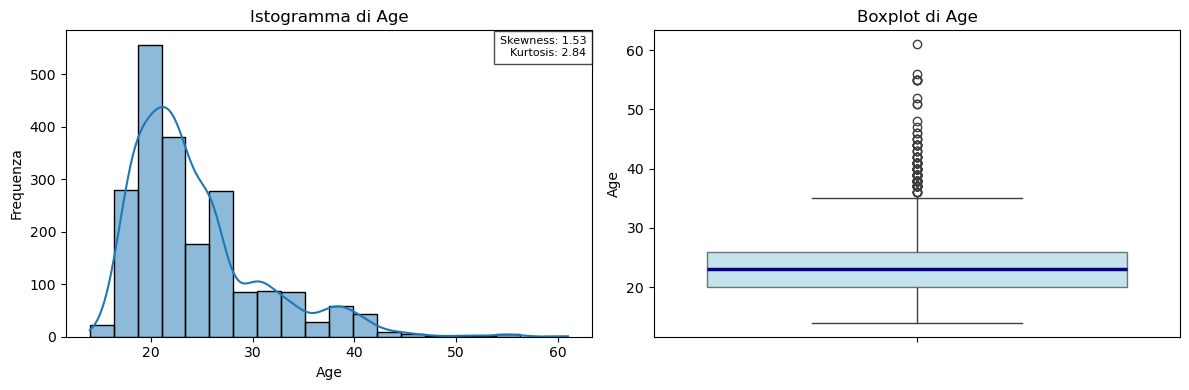

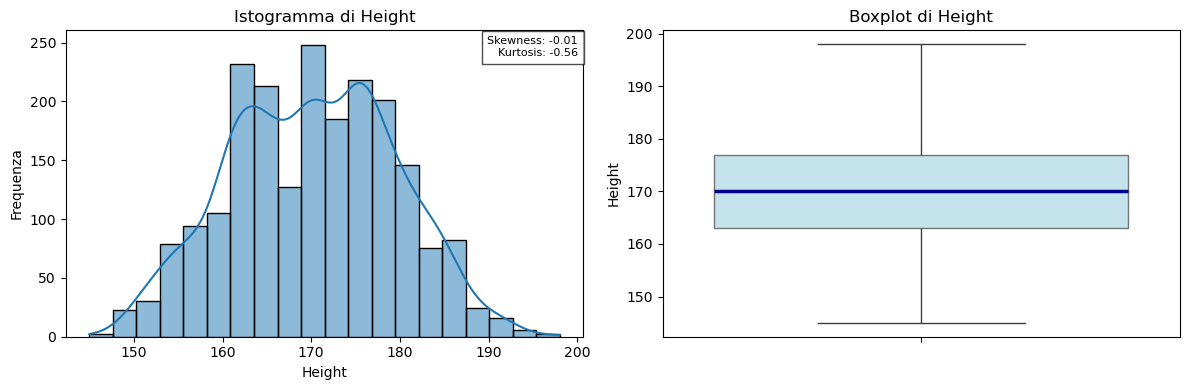

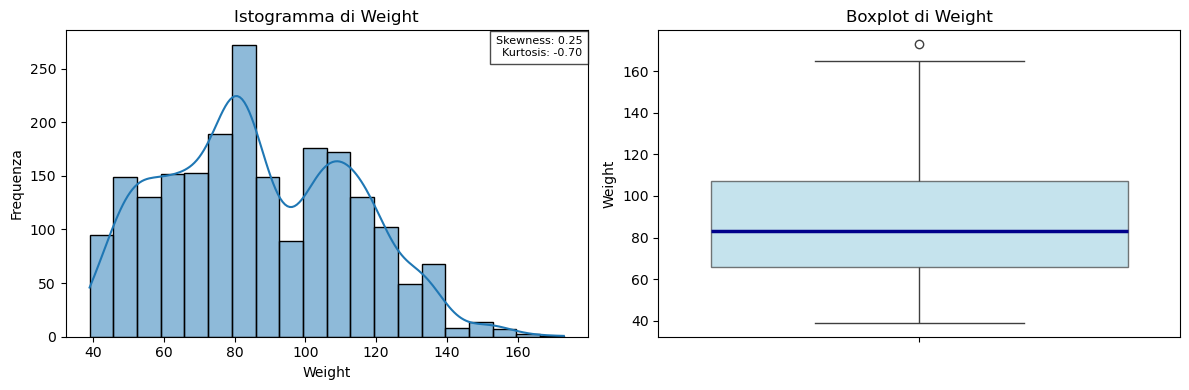

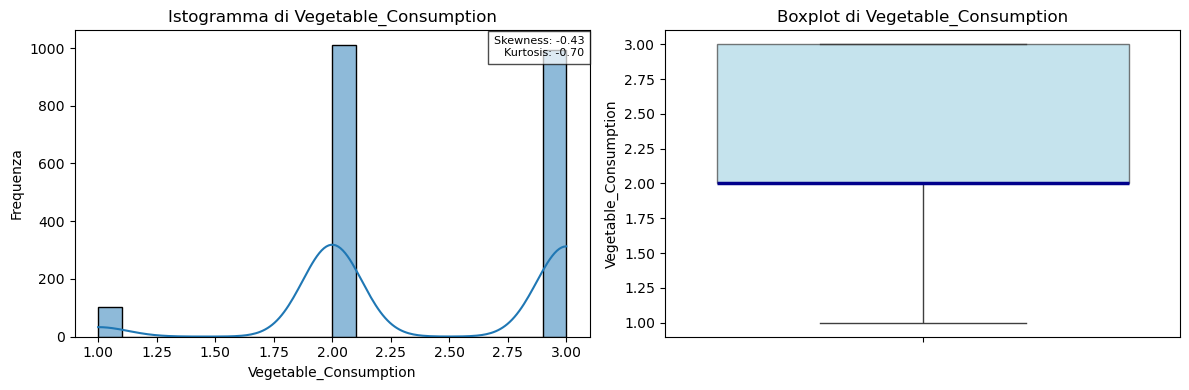

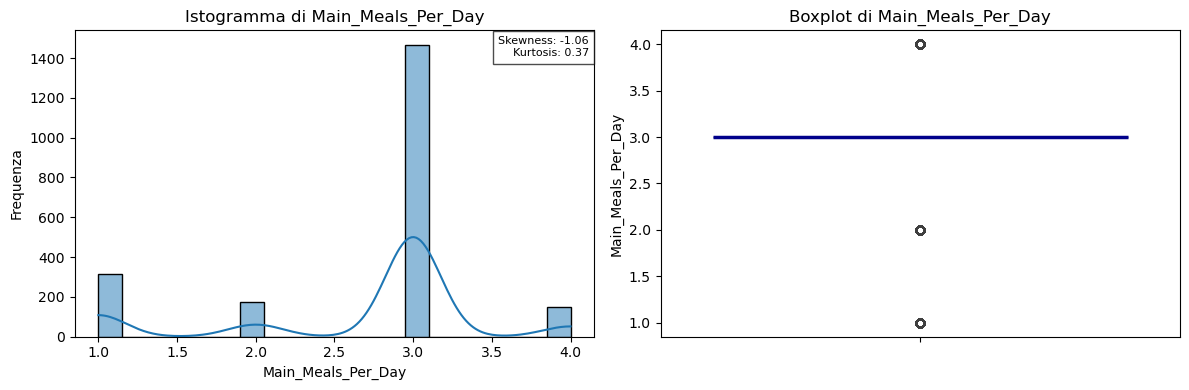

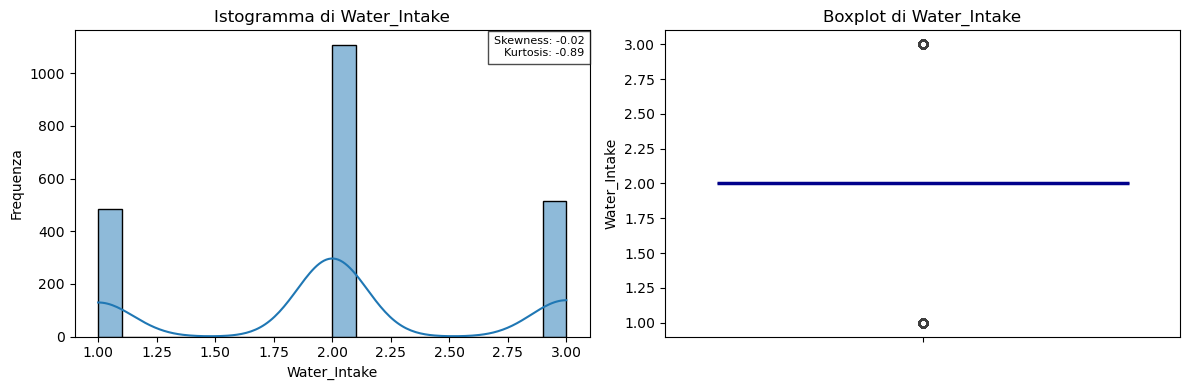

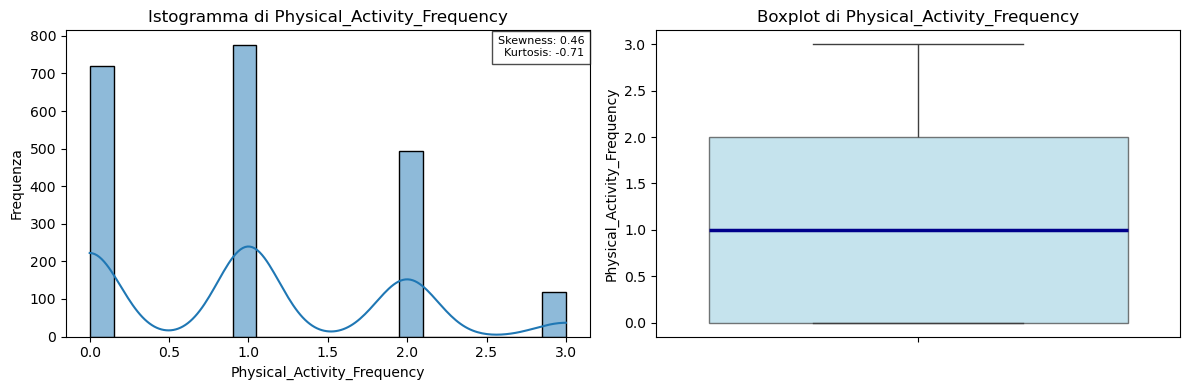

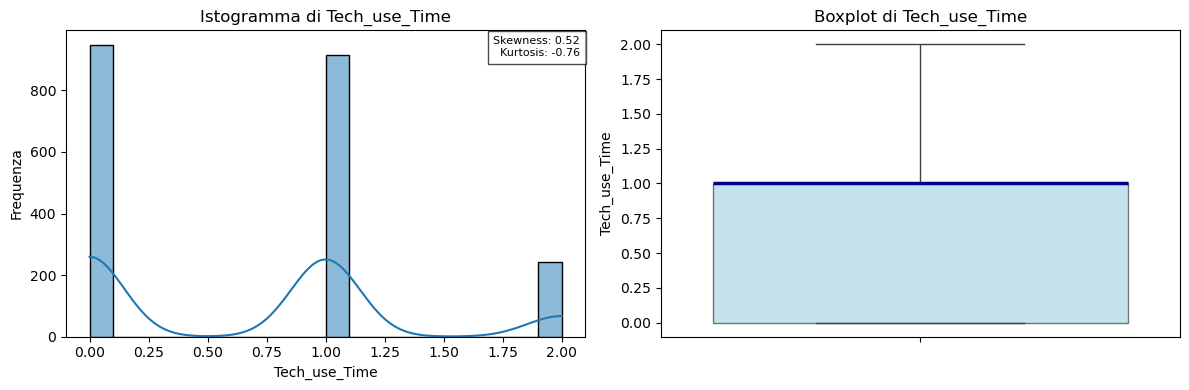

In [17]:
print("\n Distribuzioni delle variabili numeriche: \n")

for var in var_numeriche:
    skew_val = dataset_clean[var].skew()
    kurt_val = dataset_clean[var].kurt()

    # Figura con 2 subplot affiancati
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # --- ISTOGRAMMA ---
    sns.histplot(dataset_clean[var], kde=True, bins=20, ax=axes[0], )
    axes[0].set_title(f"Istogramma di {var}")
    axes[0].set_xlabel(var)
    axes[0].set_ylabel("Frequenza")
    

    # Testo skew + kurtosis
    axes[0].text(
        0.99, 0.98,
        f"Skewness: {skew_val:.2f}\nKurtosis: {kurt_val:.2f}",
        ha="right", va="top",
        transform=axes[0].transAxes,
        fontsize=8,
        bbox=dict(facecolor="white", edgecolor="black", alpha=0.7)
    )

    # --- BOXPLOT ---
    sns.boxplot(y=dataset_clean[var], ax=axes[1], boxprops=dict(facecolor="lightblue", alpha=0.7), medianprops=dict(color="darkblue", linewidth=2.5))
    axes[1].set_title(f"Boxplot di {var}")
    axes[1].set_ylabel(var)

    plt.tight_layout()
    plt.show()


 Distribuzioni delle variabili categoriche: 



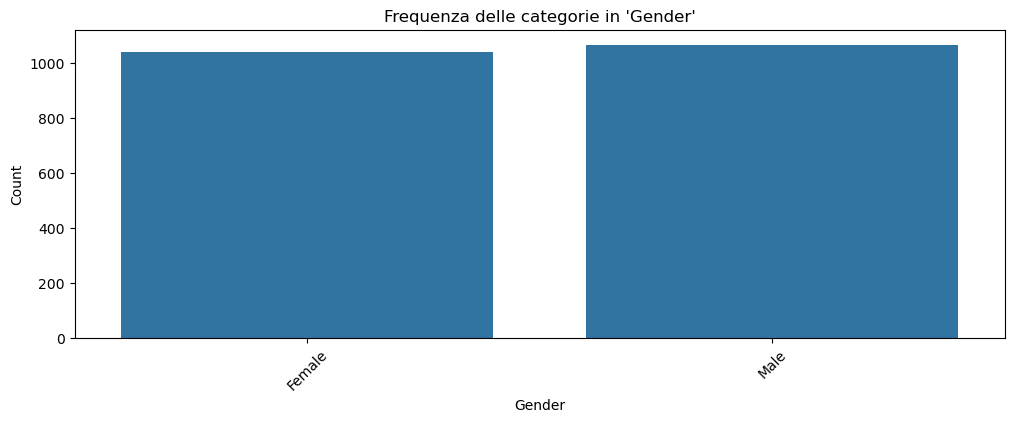

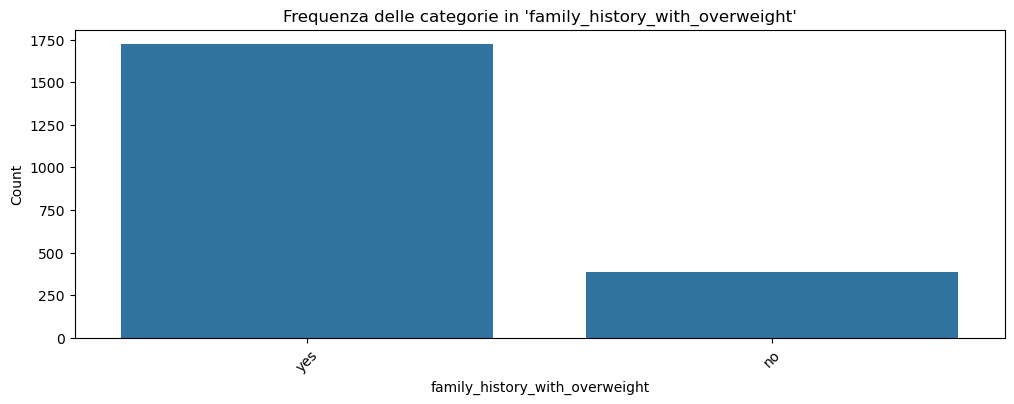

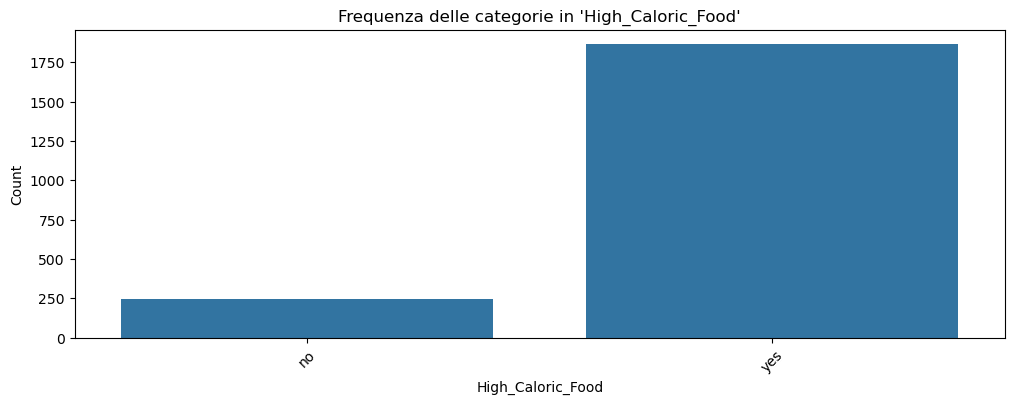

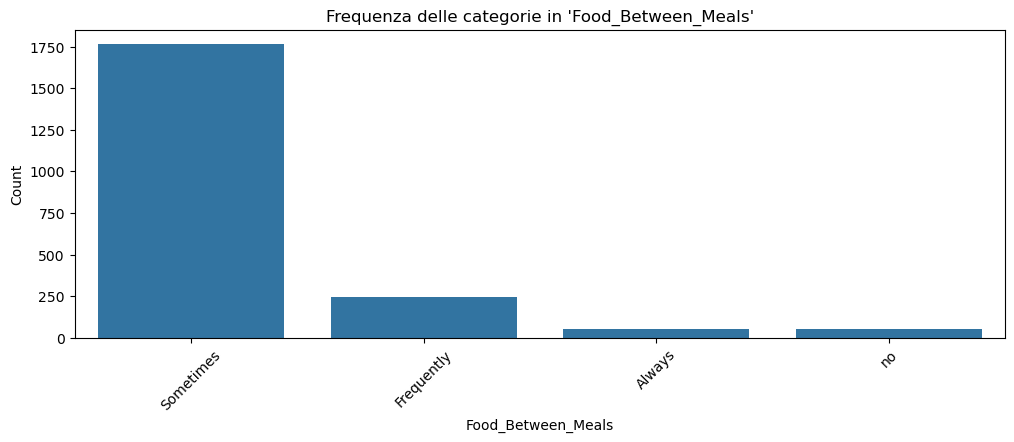

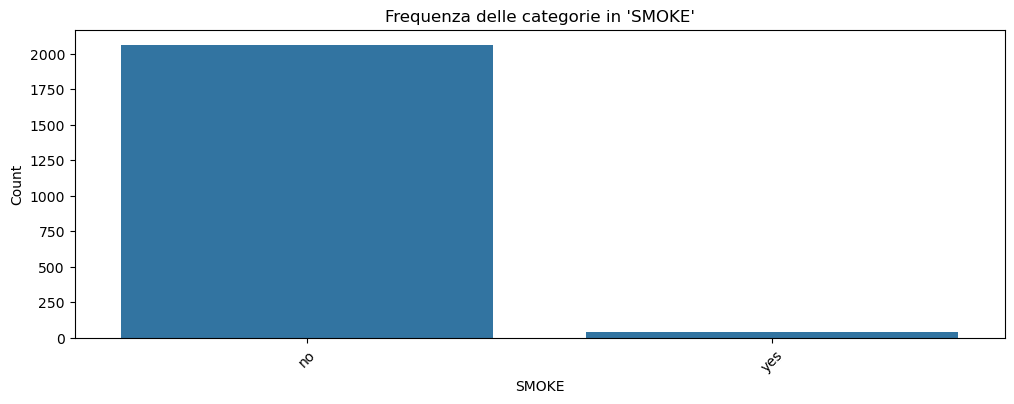

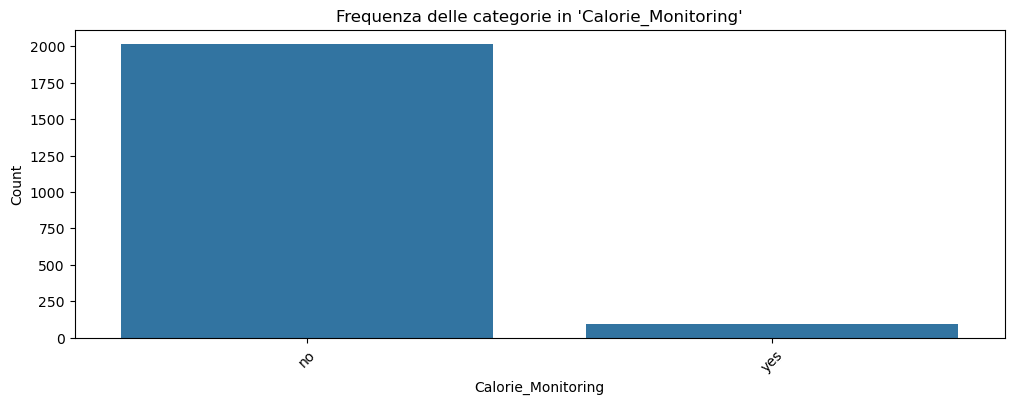

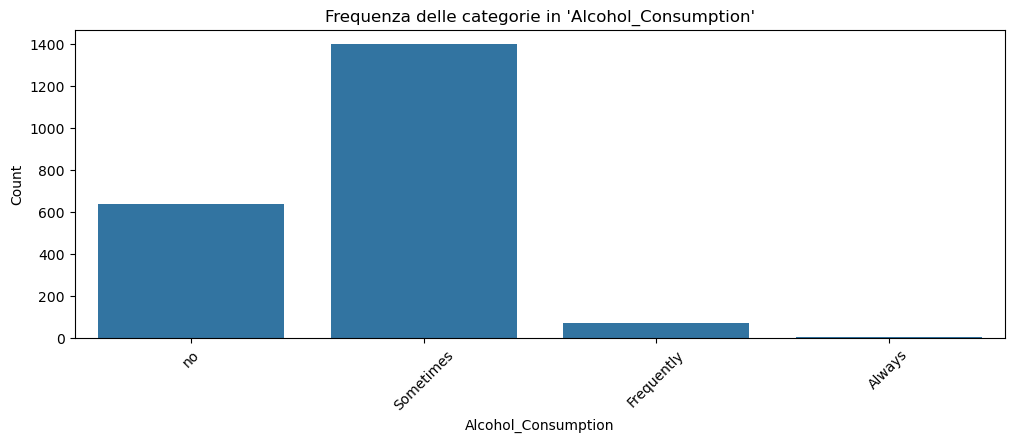

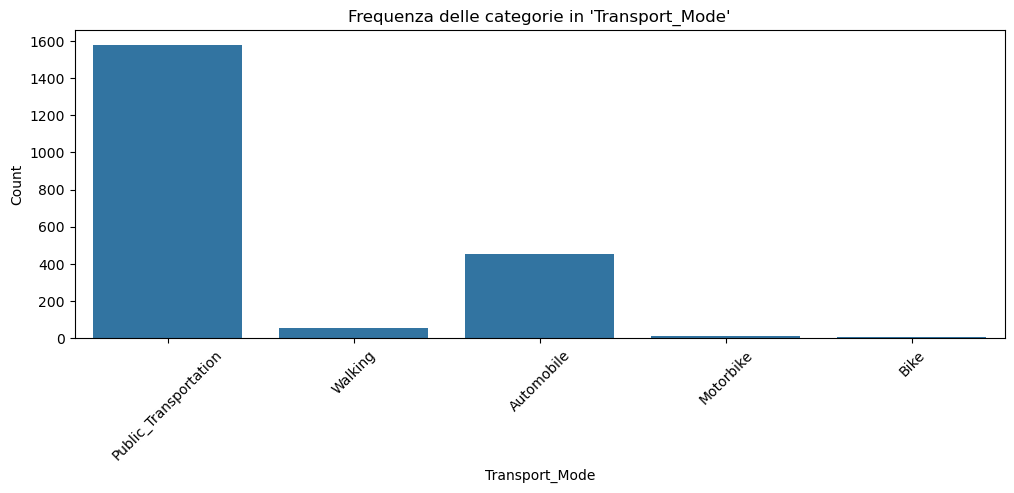

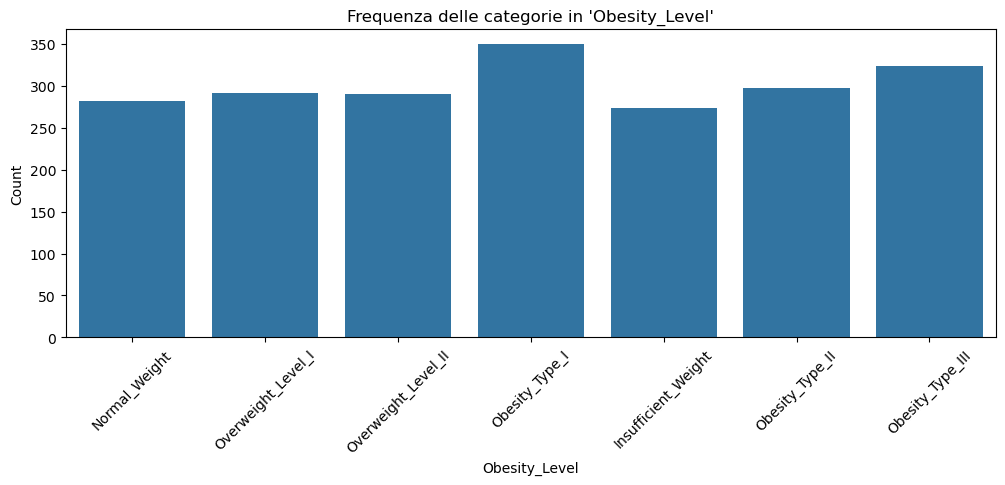

In [18]:
print("\n Distribuzioni delle variabili categoriche: \n")
for var in var_categoriche:
    plt.figure(figsize=(12,4))
    sns.countplot(x=dataset_clean[var])
    plt.title(f"Frequenza delle categorie in '{var}'")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [19]:
print("\n Correlation matrix:")
corr_matrix = dataset_clean[var_numeriche].corr()
display(corr_matrix)


 Correlation matrix:


Age    Height    Weight  \
Age                          1.000000 -0.024472  0.205404   
Height                      -0.024472  1.000000  0.461006   
Weight                       0.205404  0.461006  1.000000   
Vegetable_Consumption        0.005448 -0.052556  0.182530   
Main_Meals_Per_Day          -0.044218  0.245038  0.103514   
Water_Intake                -0.023532  0.181219  0.185917   
Physical_Activity_Frequency -0.135487  0.290934 -0.048198   
Tech_use_Time               -0.286577  0.055679 -0.042439   

                             Vegetable_Consumption  Main_Meals_Per_Day  \
Age                                       0.005448           -0.044218   
Height                                   -0.052556            0.245038   
Weight                                    0.182530            0.103514   
Vegetable_Consumption                     1.000000            0.008497   
Main_Meals_Per_Day                        0.008497            1.000000   
Water_Intake                              0.062980            0.063744   
Physical_Activity_Frequency               0.013910            0.129107   
Tech_use_Time                            -0.075916            0.014118   

                             Water_Intake  Physical_Activity_Frequency  \
Age                             -0.023532                    -0.135487   
Height                           0.181219                     0.290934   
Weight                           0.185917                    -0.048198   
Vegetable_Consumption            0.062980                     0.013910   
Main_Meals_Per_Day               0.063744                     0.129107   
Water_Intake                     1.000000                     0.119169   
Physical_Activity_Frequency      0.119169                     1.000000   
Tech_use_Time                   -0.029973                     0.056380   

                             Tech_use_Time  
Age                              -0.286577  
Height                            0.055679  
Weight                           -0.042439  
Vegetable_Consumption            -0.075916  
Main_Meals_Per_Day                0.014118  
Water_Intake                     -0.029973  
Physical_Activity_Frequency       0.056380  
Tech_use_Time                     1.000000

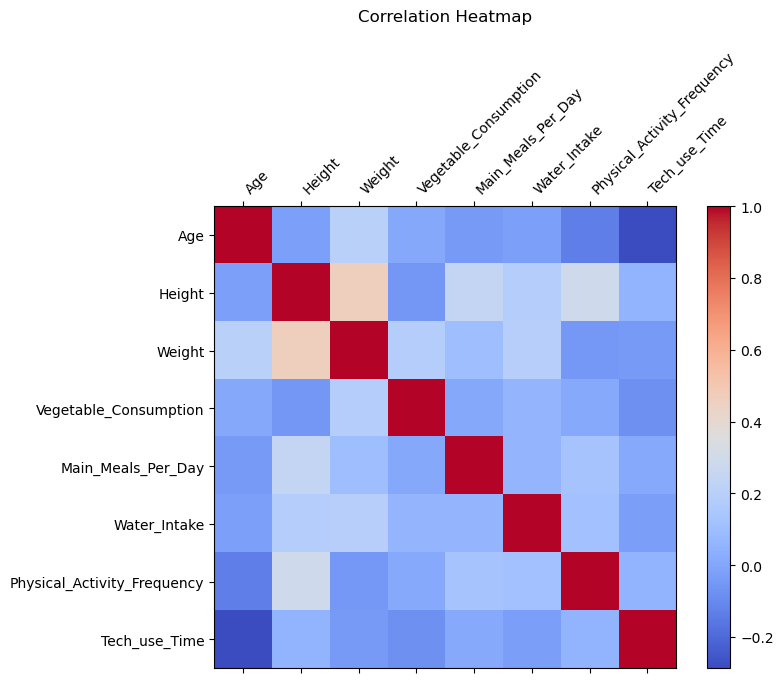

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
cax = ax.matshow(corr_matrix, cmap="coolwarm")
fig.colorbar(cax)
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='left')
ax.set_yticklabels(corr_matrix.columns)
plt.title("Correlation Heatmap", pad=20)
plt.show()

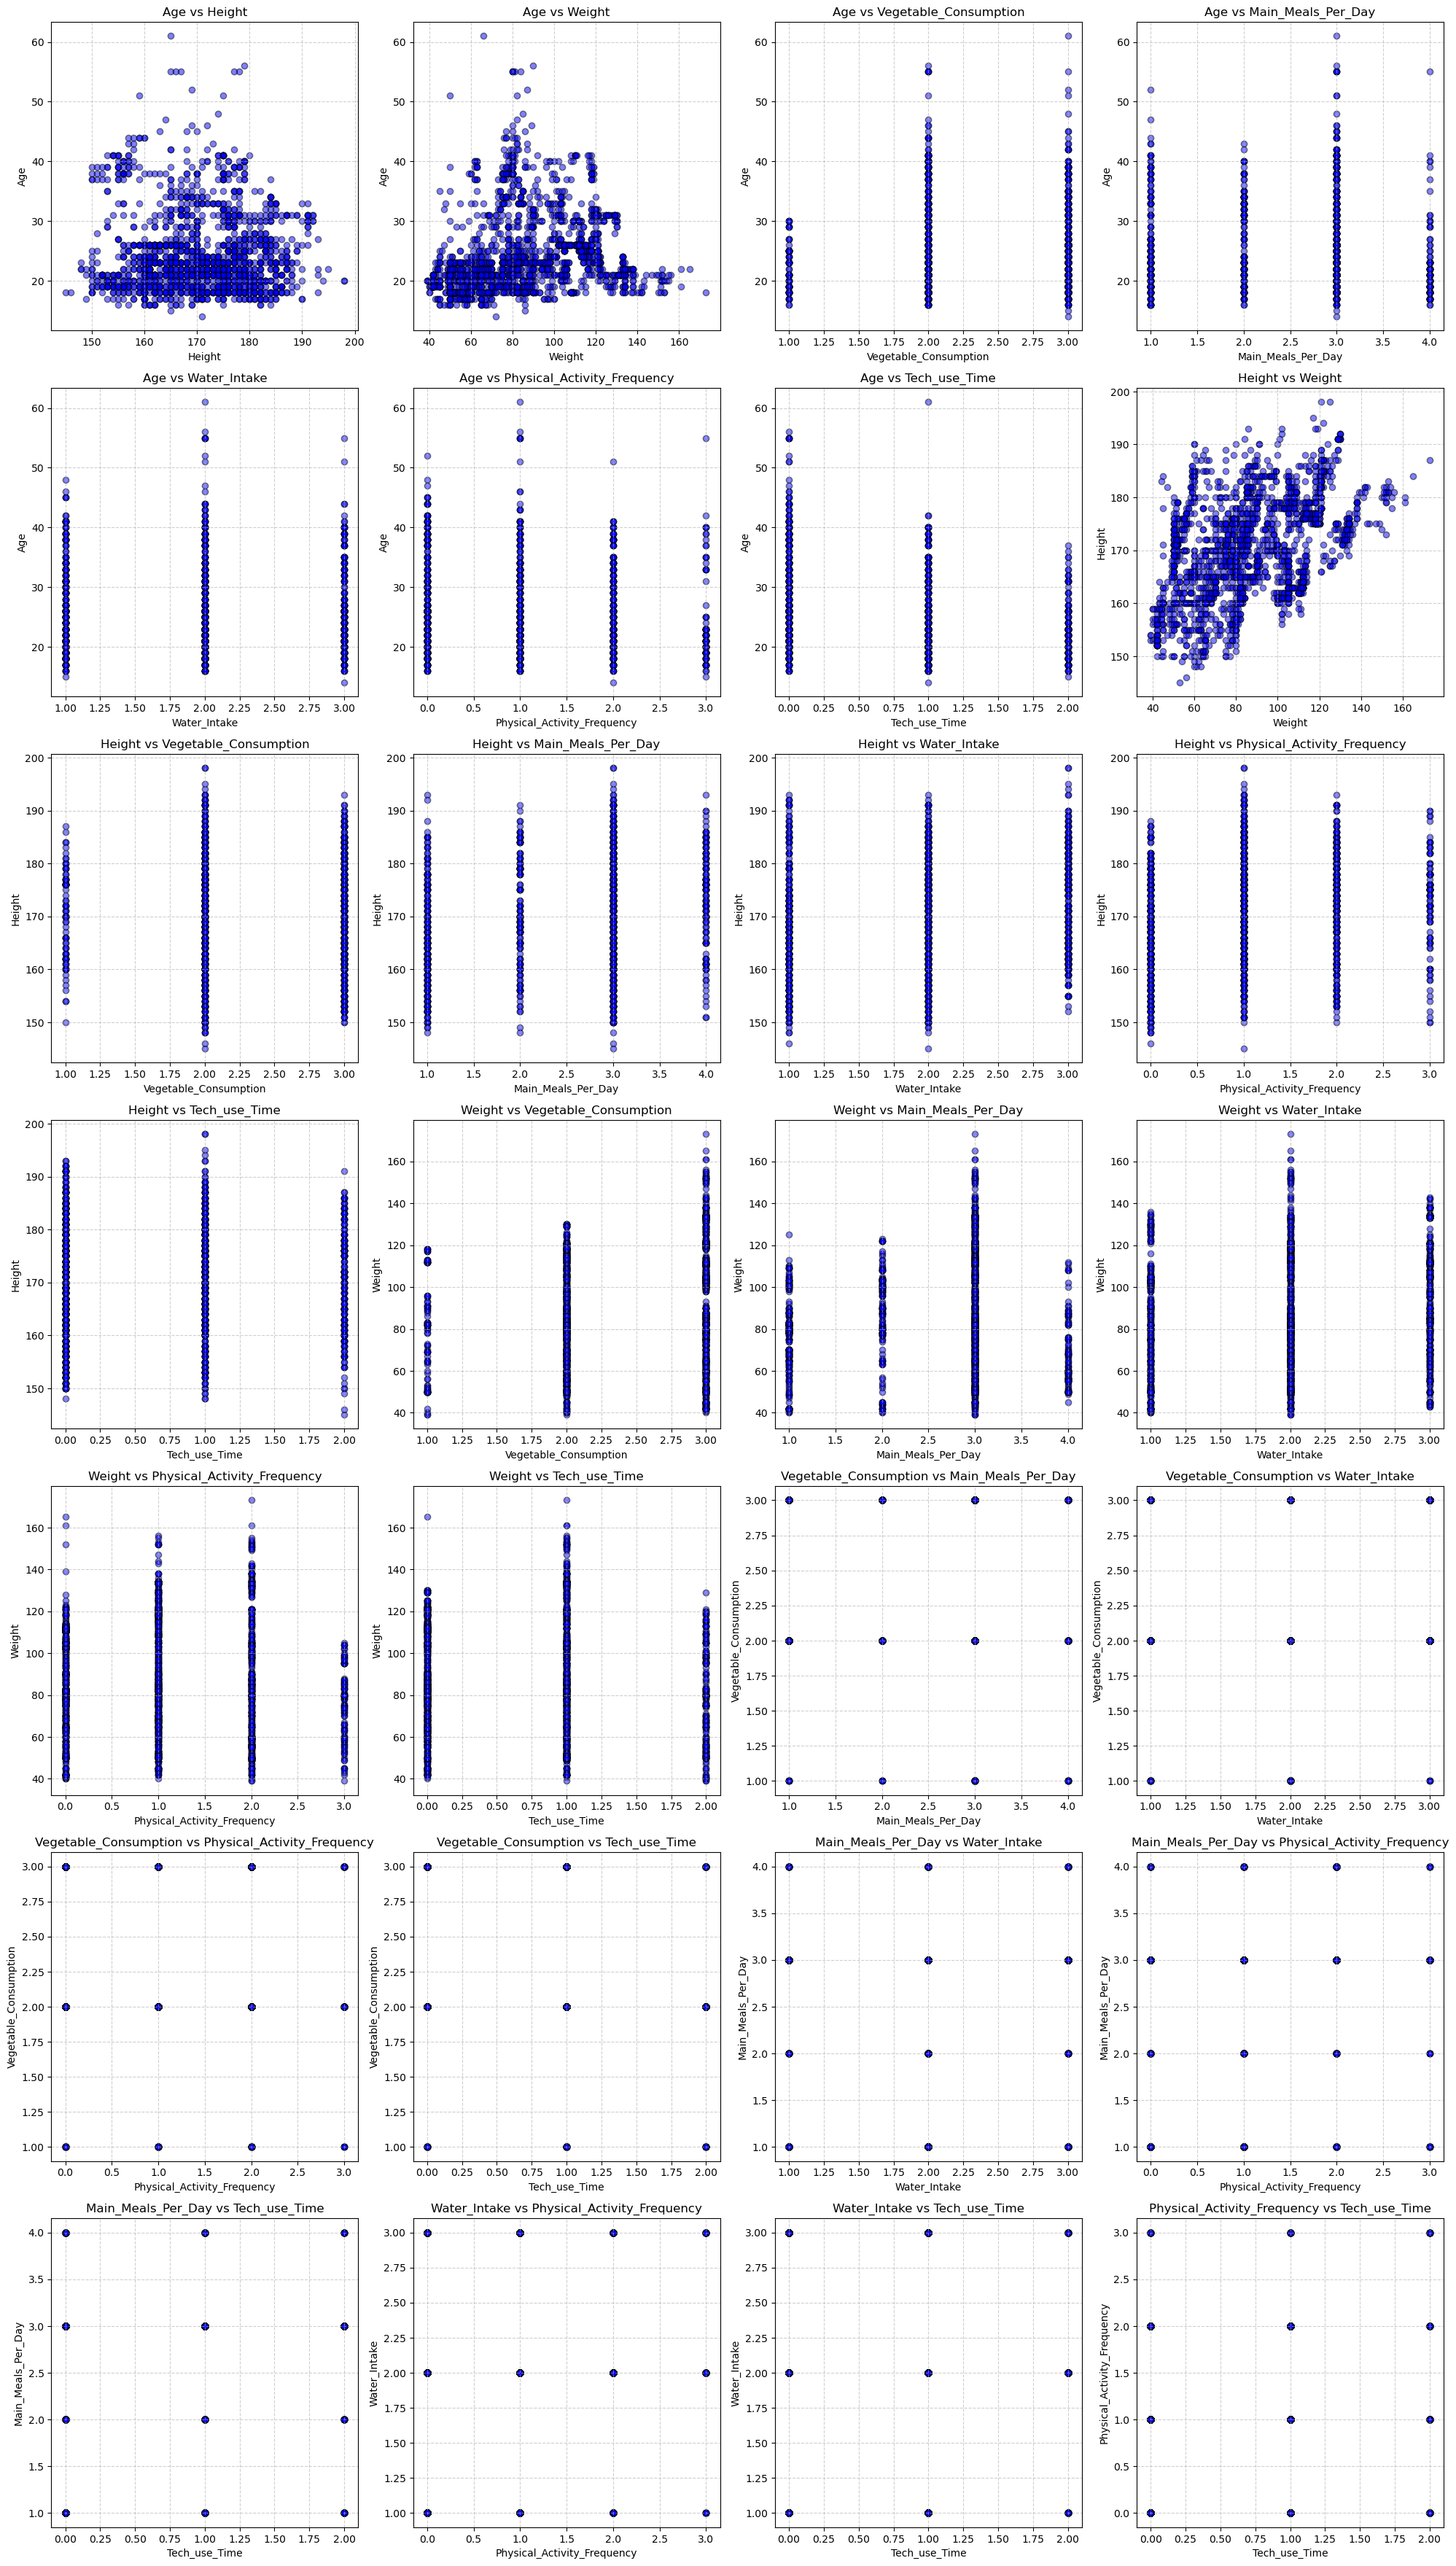

In [22]:
n_vars = len(var_numeriche)

# Calcola numero di combinazioni totali
total_plots = n_vars * (n_vars - 1)  # Tutte le coppie diverse

# Crea griglia ottimale
n_cols = min(4, n_vars)  # Massimo 4 colonne
n_rows = (total_plots + n_cols - 1) // n_cols  # Calcolo righe necessarie

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]  # Appiattisci l'array

plot_index = 0
for i, var1 in enumerate(var_numeriche):
    for j, var2 in enumerate(var_numeriche):
        if j > i:  # usa solo coppie NON ordinate
            ax = axes[plot_index]
            ax.scatter(dataset_clean[var2], dataset_clean[var1],
                       alpha=0.5, color="blue", edgecolors="black")
            ax.set_title(f"{var1} vs {var2}")
            ax.set_xlabel(var2)
            ax.set_ylabel(var1)
            ax.grid(True, linestyle="--", alpha=0.6)
            plot_index += 1

# Nascondi assi non utilizzati
for idx in range(plot_index, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

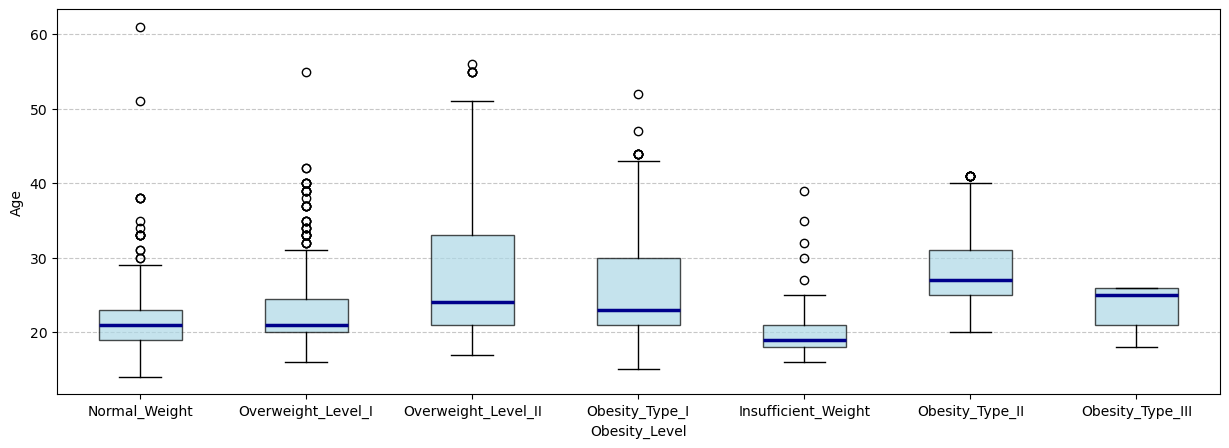

In [23]:
# Confronto di una variabile numerica rispetto a una categorica
# (Esempio: distribuzione dell'età per ciascun livello di obesità)
target = "Obesity_Level"  # nome della variabile target

if target in dataset_clean.columns:
    first_numvar = var_numeriche[0]  # prima variabile numerica
    categories = dataset_clean[target].unique()
    plt.figure(figsize=(15,5))
    data_to_plot = [dataset_clean[dataset_clean[target] == cat][first_numvar] for cat in categories]
    plt.boxplot(data_to_plot, tick_labels=categories, patch_artist=True, boxprops=dict(facecolor='lightblue', alpha = 0.7), medianprops=dict(color='darkblue', linewidth=2.5)) 
    plt.xlabel(target)
    plt.ylabel(first_numvar)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

In [24]:
categorical_pairs = [(var_categoriche[i], var_categoriche[j])
                     for i in range(len(var_categoriche))
                         for j in range(i+1, len(var_categoriche))]

print("\nContingency tables:")
for var1, var2 in categorical_pairs:  
    print(f"\n{var1} vs {var2}")
    display(pd.crosstab(dataset_clean[var1], dataset_clean[var2]))


Contingency tables:

Gender vs family_history_with_overweight


family_history_with_overweight   no  yes
Gender                                  
Female                          233  808
Male                            153  914


Gender vs High_Caloric_Food


High_Caloric_Food   no  yes
Gender                     
Female             143  898
Male               101  966


Gender vs Food_Between_Meals


Food_Between_Meals  Always  Frequently  Sometimes  no
Gender                                               
Female                  22         161        843  15
Male                    30          81        920  36


Gender vs SMOKE


SMOKE     no  yes
Gender           
Female  1027   14
Male    1038   29


Gender vs Calorie_Monitoring


Calorie_Monitoring    no  yes
Gender                       
Female               971   70
Male                1041   26


Gender vs Alcohol_Consumption


Alcohol_Consumption  Always  Frequently  Sometimes   no
Gender                                                 
Female                    0          28        710  303
Male                      1          41        689  336


Gender vs Transport_Mode


Transport_Mode  Automobile  Bike  Motorbike  Public_Transportation  Walking
Gender                                                                     
Female                 164     0          2                    854       21
Male                   291     7          9                    725       35


Gender vs Obesity_Level


Obesity_Level  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Gender                                                              
Female                         175            137             156   
Male                            99            145             194   

Obesity_Level  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Gender                                                                 
Female                       2               323                 145   
Male                       295                 1                 146   

Obesity_Level  Overweight_Level_II  
Gender                              
Female                         103  
Male                           187


family_history_with_overweight vs High_Caloric_Food


High_Caloric_Food                no   yes
family_history_with_overweight           
no                              100   286
yes                             144  1578


family_history_with_overweight vs Food_Between_Meals


Food_Between_Meals              Always  Frequently  Sometimes  no
family_history_with_overweight                                   
no                                  19         114        220  33
yes                                 33         128       1543  18


family_history_with_overweight vs SMOKE


SMOKE                             no  yes
family_history_with_overweight           
no                               380    6
yes                             1685   37


family_history_with_overweight vs Calorie_Monitoring


Calorie_Monitoring                no  yes
family_history_with_overweight           
no                               337   49
yes                             1675   47


family_history_with_overweight vs Alcohol_Consumption


Alcohol_Consumption             Always  Frequently  Sometimes   no
family_history_with_overweight                                    
no                                   0          15        267  104
yes                                  1          54       1132  535


family_history_with_overweight vs Transport_Mode


Transport_Mode                  Automobile  Bike  Motorbike  \
family_history_with_overweight                                
no                                      50     2          5   
yes                                    405     5          6   

Transport_Mode                  Public_Transportation  Walking  
family_history_with_overweight                                  
no                                                310       19  
yes                                              1269       37


family_history_with_overweight vs Obesity_Level


Obesity_Level                   Insufficient_Weight  Normal_Weight  \
family_history_with_overweight                                       
no                                              148            131   
yes                                             126            151   

Obesity_Level                   Obesity_Type_I  Obesity_Type_II  \
family_history_with_overweight                                    
no                                           6                1   
yes                                        344              296   

Obesity_Level                   Obesity_Type_III  Overweight_Level_I  \
family_history_with_overweight                                         
no                                             0                  82   
yes                                          324                 209   

Obesity_Level                   Overweight_Level_II  
family_history_with_overweight                       
no                                               18  
yes                                             272


High_Caloric_Food vs Food_Between_Meals


Food_Between_Meals  Always  Frequently  Sometimes  no
High_Caloric_Food                                    
no                      12          67        156   9
yes                     40         175       1607  42


High_Caloric_Food vs SMOKE


SMOKE                no  yes
High_Caloric_Food           
no                  234   10
yes                1831   33


High_Caloric_Food vs Calorie_Monitoring


Calorie_Monitoring    no  yes
High_Caloric_Food            
no                   206   38
yes                 1806   58


High_Caloric_Food vs Alcohol_Consumption


Alcohol_Consumption  Always  Frequently  Sometimes   no
High_Caloric_Food                                      
no                        0          15        117  112
yes                       1          54       1282  527


High_Caloric_Food vs Transport_Mode


Transport_Mode     Automobile  Bike  Motorbike  Public_Transportation  Walking
High_Caloric_Food                                                             
no                         36     4          3                    175       26
yes                       419     3          8                   1404       30


High_Caloric_Food vs Obesity_Level


Obesity_Level      Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
High_Caloric_Food                                                       
no                                  52             77              11   
yes                                222            205             339   

Obesity_Level      Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
High_Caloric_Food                                                          
no                               7                 1                  22   
yes                            290               323                 269   

Obesity_Level      Overweight_Level_II  
High_Caloric_Food                       
no                                  74  
yes                                216


Food_Between_Meals vs SMOKE


SMOKE                 no  yes
Food_Between_Meals           
Always                50    2
Frequently           233    9
Sometimes           1732   31
no                    50    1


Food_Between_Meals vs Calorie_Monitoring


Calorie_Monitoring    no  yes
Food_Between_Meals           
Always                44    8
Frequently           215   27
Sometimes           1709   54
no                    44    7


Food_Between_Meals vs Alcohol_Consumption


Alcohol_Consumption  Always  Frequently  Sometimes   no
Food_Between_Meals                                     
Always                    0           7         27   18
Frequently                1          16        120  105
Sometimes                 0          44       1210  509
no                        0           2         42    7


Food_Between_Meals vs Transport_Mode


Transport_Mode      Automobile  Bike  Motorbike  Public_Transportation  \
Food_Between_Meals                                                       
Always                      12     1          1                     32   
Frequently                  25     0          5                    201   
Sometimes                  415     6          5                   1300   
no                           3     0          0                     46   

Transport_Mode      Walking  
Food_Between_Meals           
Always                    6  
Frequently               11  
Sometimes                37  
no                        2


Food_Between_Meals vs Obesity_Level


Obesity_Level       Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Food_Between_Meals                                                       
Always                                2             34               6   
Frequently                          121             83               6   
Sometimes                           148            155             337   
no                                    3             10               1   

Obesity_Level       Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Food_Between_Meals                                                          
Always                            2                 0                   5   
Frequently                        1                 1                  14   
Sometimes                       293               323                 237   
no                                1                 0                  35   

Obesity_Level       Overweight_Level_II  
Food_Between_Meals                       
Always                                3  
Frequently                           16  
Sometimes                           270  
no                                    1


SMOKE vs Calorie_Monitoring


Calorie_Monitoring    no  yes
SMOKE                        
no                  1974   91
yes                   38    5


SMOKE vs Alcohol_Consumption


Alcohol_Consumption  Always  Frequently  Sometimes   no
SMOKE                                                  
no                        1          62       1369  633
yes                       0           7         30    6


SMOKE vs Transport_Mode


Transport_Mode  Automobile  Bike  Motorbike  Public_Transportation  Walking
SMOKE                                                                      
no                     444     7         10                   1550       54
yes                     11     0          1                     29        2


SMOKE vs Obesity_Level


Obesity_Level  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
SMOKE                                                               
no                             273            270             344   
yes                              1             12               6   

Obesity_Level  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
SMOKE                                                                  
no                         282               323                 288   
yes                         15                 1                   3   

Obesity_Level  Overweight_Level_II  
SMOKE                               
no                             285  
yes                              5


Calorie_Monitoring vs Alcohol_Consumption


Alcohol_Consumption  Always  Frequently  Sometimes   no
Calorie_Monitoring                                     
no                        1          61       1344  606
yes                       0           8         55   33


Calorie_Monitoring vs Transport_Mode


Transport_Mode      Automobile  Bike  Motorbike  Public_Transportation  \
Calorie_Monitoring                                                       
no                         442     6          9                   1505   
yes                         13     1          2                     74   

Transport_Mode      Walking  
Calorie_Monitoring           
no                       50  
yes                       6


Calorie_Monitoring vs Obesity_Level


Obesity_Level       Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Calorie_Monitoring                                                       
no                                  252            252             348   
yes                                  22             30               2   

Obesity_Level       Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Calorie_Monitoring                                                          
no                              296               324                 254   
yes                               1                 0                  37   

Obesity_Level       Overweight_Level_II  
Calorie_Monitoring                       
no                                  286  
yes                                   4


Alcohol_Consumption vs Transport_Mode


Transport_Mode       Automobile  Bike  Motorbike  Public_Transportation  \
Alcohol_Consumption                                                       
Always                        0     0          0                      0   
Frequently                   28     0          0                     38   
Sometimes                   269     4          6                   1091   
no                          158     3          5                    450   

Transport_Mode       Walking  
Alcohol_Consumption           
Always                     1  
Frequently                 3  
Sometimes                 29  
no                        23


Alcohol_Consumption vs Obesity_Level


Obesity_Level        Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Alcohol_Consumption                                                       
Always                                 0              1               0   
Frequently                             1             18              13   
Sometimes                            156            157             172   
no                                   117            106             165   

Obesity_Level        Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Alcohol_Consumption                                                          
Always                             0                 0                   0   
Frequently                         2                 0                  16   
Sometimes                        224               323                 224   
no                                71                 1                  51   

Obesity_Level        Overweight_Level_II  
Alcohol_Consumption                       
Always                                 0  
Frequently                            19  
Sometimes                            143  
no                                   128


Transport_Mode vs Obesity_Level


Obesity_Level          Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Transport_Mode                                                              
Automobile                              46             43             109   
Bike                                     0              4               0   
Motorbike                                0              6               3   
Public_Transportation                  222            197             236   
Walking                                  6             32               2   

Obesity_Level          Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Transport_Mode                                                                 
Automobile                          95                 1                  67   
Bike                                 1                 0                   2   
Motorbike                            0                 0                   1   
Public_Transportation              200               323                 212   
Walking                              1                 0                   9   

Obesity_Level          Overweight_Level_II  
Transport_Mode                              
Automobile                              94  
Bike                                     0  
Motorbike                                1  
Public_Transportation                  189  
Walking                                  6

## 4.1) 

In [25]:
dataset_clean = dataset_clean.copy()
bin_categoriche = ["Gender", "family_history_with_overweight", "High_Caloric_Food", "SMOKE", "Calorie_Monitoring"]
label_encoders = {}

for var in bin_categoriche:
    le = LabelEncoder()
    dataset_clean[var] = le.fit_transform(dataset_clean[var])
    label_encoders[var] = le
    print(f"{var}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
family_history_with_overweight: {'no': np.int64(0), 'yes': np.int64(1)}
High_Caloric_Food: {'no': np.int64(0), 'yes': np.int64(1)}
SMOKE: {'no': np.int64(0), 'yes': np.int64(1)}
Calorie_Monitoring: {'no': np.int64(0), 'yes': np.int64(1)}


In [26]:
multi_categoriche = ["Transport_Mode"]
dataset_clean = pd.get_dummies(dataset_clean, columns=multi_categoriche, prefix=multi_categoriche, dtype = int)

print(f"\nDimensione dopo one-hot encoding: {dataset_clean.shape}")


Dimensione dopo one-hot encoding: (2108, 21)


In [27]:
# Variabili ORDINALI (hanno un ordine naturale)
var_ordinali = {
    "Food_Between_Meals": ["no", "Sometimes", "Frequently", "Always"],
    "Alcohol_Consumption": ["no", "Sometimes", "Frequently", "Always"],
    "Obesity_Level": ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]
}

for var, order in var_ordinali.items():
    dataset_clean[var] = dataset_clean[var].astype("category")
    dataset_clean[var] = dataset_clean[var].cat.set_categories(order, ordered=True)
    dataset_clean[var] = dataset_clean[var].cat.codes
dataset_clean


Gender  Age  Height  Weight  family_history_with_overweight  \
0          0   21     162      64                               1   
1          0   21     152      56                               1   
2          1   23     180      77                               1   
3          1   27     180      87                               0   
4          1   22     178      90                               0   
...      ...  ...     ...     ...                             ...   
2109       0   21     171     131                               1   
2110       0   22     175     134                               1   
2111       0   23     175     134                               1   
2112       0   24     174     133                               1   
2113       0   24     174     133                               1   

      High_Caloric_Food  Vegetable_Consumption  Main_Meals_Per_Day  \
0                     0                      2                   3   
1                     0                      3                   3   
2                     0                      2                   3   
3                     0                      3                   3   
4                     0                      2                   1   
...                 ...                    ...                 ...   
2109                  1                      3                   3   
2110                  1                      3                   3   
2111                  1                      3                   3   
2112                  1                      3                   3   
2113                  1                      3                   3   

      Food_Between_Meals  SMOKE  ...  Calorie_Monitoring  \
0                      1      0  ...                   0   
1                      1      1  ...                   1   
2                      1      0  ...                   0   
3                      1      0  ...                   0   
4                      1      0  ...                   0   
...                  ...    ...  ...                 ...   
2109                   1      0  ...                   0   
2110                   1      0  ...                   0   
2111                   1      0  ...                   0   
2112                   1      0  ...                   0   
2113                   1      0  ...                   0   

      Physical_Activity_Frequency  Tech_use_Time  Alcohol_Consumption  \
0                               0              1                    0   
1                               3              0                    1   
2                               2              1                    2   
3                               2              0                    2   
4                               0              0                    1   
...                           ...            ...                  ...   
2109                            2              1                    1   
2110                            1              1                    1   
2111                            1              1                    1   
2112                            1              1                    1   
2113                            1              1                    1   

      Obesity_Level  Transport_Mode_Automobile  Transport_Mode_Bike  \
0                 1                          0                    0   
1                 1                          0                    0   
2                 1                          0                    0   
3                 2                          0                    0   
4                 3                          0                    0   
...             ...                        ...                  ...   
2109              6                          0                    0   
2110              6                          0                    0   
2111              6                          0                    0   
2112              6         

Se includessimo la variabile target, la PCA la tratterebbe come una feature qualunque e cercherà di massimizzare anche la sua varianza. <br>
La PCA si applica solo alle feature indipendenti (X) <br>
La variabile target (y) va SEMPRE esclusa <br>

In [28]:
# 4. SEPARAZIONE FEATURES E TARGET
print("\nPREPARAZIONE DATI PER PCA:")

var_target = "Obesity_Level"
# Features per PCA (escludiamo la target)
features_pca = [var for var in dataset_clean.columns if var != var_target]

X = dataset_clean[features_pca]
y = dataset_clean[var_target]  # Target originale

print(f"Numero di features per PCA: {len(features_pca)}")
print(f"Shape di X: {X.shape}")


PREPARAZIONE DATI PER PCA:
Numero di features per PCA: 20
Shape di X: (2108, 20)


In [29]:
#Standardizziamo le var numeriche
print("\nSCALING DELLE FEATURES:")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Statistiche prima dello scaling:")
print(pd.DataFrame(X, columns=features_pca).describe().loc[["mean", "std"]].round(2))
print("\n")
print("\nStatistiche dopo lo scaling:")
print(pd.DataFrame(X_scaled, columns=features_pca).describe().loc[["mean", "std"]].round(2))


SCALING DELLE FEATURES:
Statistiche prima dello scaling:
      Gender    Age  Height  Weight  family_history_with_overweight  \
mean    0.51  24.30  170.17   86.61                            0.82   
std     0.50   6.34    9.33   26.20                            0.39   

      High_Caloric_Food  Vegetable_Consumption  Main_Meals_Per_Day  \
mean               0.88                   2.42                2.69   
std                0.32                   0.59                0.81   

      Food_Between_Meals  SMOKE  Water_Intake  Calorie_Monitoring  \
mean                1.14   0.02          2.02                0.05   
std                 0.47   0.14          0.69                0.21   

      Physical_Activity_Frequency  Tech_use_Time  Alcohol_Consumption  \
mean                         1.01           0.67                 0.73   
std                          0.90           0.67                 0.52   

      Transport_Mode_Automobile  Transport_Mode_Bike  \
mean                       0.22  

In [30]:
print("\nANALISI COMPONENTI PRINCIPALI (PCA):")
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Analisi della varianza spiegata
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Varianza spiegata per componente:")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1}: {var:.4f} ({cum_var:.4f} cumulativa)")


ANALISI COMPONENTI PRINCIPALI (PCA):
Varianza spiegata per componente:
PC1: 0.1383 (0.1383 cumulativa)
PC2: 0.1140 (0.2523 cumulativa)
PC3: 0.0897 (0.3420 cumulativa)
PC4: 0.0670 (0.4090 cumulativa)
PC5: 0.0568 (0.4659 cumulativa)
PC6: 0.0549 (0.5208 cumulativa)
PC7: 0.0522 (0.5730 cumulativa)
PC8: 0.0509 (0.6239 cumulativa)
PC9: 0.0494 (0.6732 cumulativa)
PC10: 0.0473 (0.7205 cumulativa)
PC11: 0.0446 (0.7651 cumulativa)
PC12: 0.0422 (0.8073 cumulativa)
PC13: 0.0393 (0.8466 cumulativa)
PC14: 0.0380 (0.8847 cumulativa)
PC15: 0.0340 (0.9187 cumulativa)
PC16: 0.0309 (0.9496 cumulativa)
PC17: 0.0213 (0.9709 cumulativa)
PC18: 0.0181 (0.9890 cumulativa)
PC19: 0.0110 (1.0000 cumulativa)
PC20: 0.0000 (1.0000 cumulativa)


RISULTATO PRINCIPALE:
Per spiegare almeno l'80% della varianza servono 12 componenti principali
Varianza cumulativa con 12 componenti: 80.73%


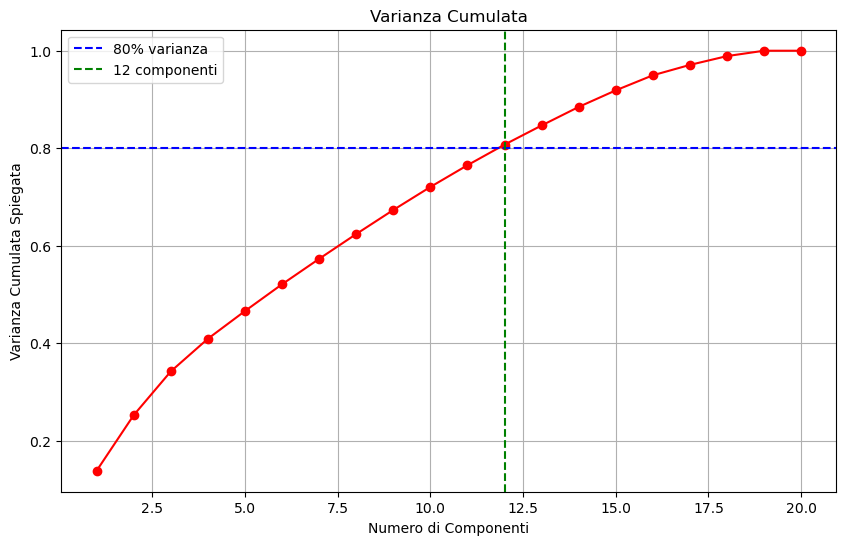

In [31]:
# Analisi dettagliata per l'80%
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1

print(f"RISULTATO PRINCIPALE:")

print(f"Per spiegare almeno l'80% della varianza servono {n_components_80} componenti principali")
print(f"Varianza cumulativa con {n_components_80} componenti: {cumulative_variance[n_components_80-1]:.2%}")

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
feature_names = dataset_clean.columns.tolist()
obesity_categories = dataset_clean["Obesity_Level"]

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, "ro-")
plt.axhline(y=0.80, color="b", linestyle="--", label="80% varianza")
plt.axvline(x=n_components_80, color="g", linestyle="--", label=f'{n_components_80} componenti')
plt.xlabel("Numero di Componenti")
plt.ylabel("Varianza Cumulata Spiegata")
plt.title("Varianza Cumulata")
plt.legend()
plt.grid(True)
plt.show()

Riduzione efficace: **-40%** dimensioni mantenendo **80%** informazione

Struttura bilanciata: Nessuna componente troppo dominante

Progressione regolare: Calo graduale della varianza

Dati informativi: Prime componenti spiegano varianza significativa

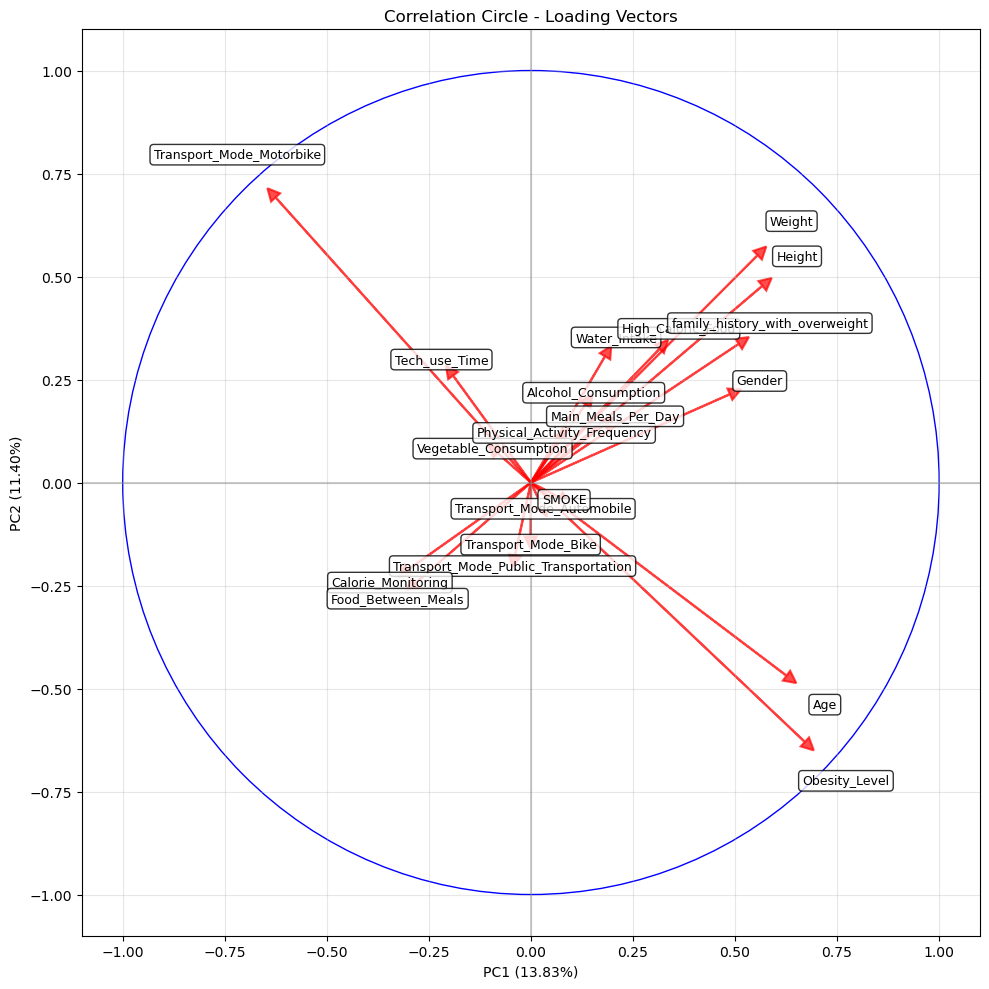

In [32]:
# ==========================
# 1) CORRELATION CIRCLE
# ==========================
plt.figure(figsize=(10,10))
ax = plt.gca()

# Draw the unit circle
circle = plt.Circle((0, 0), 1, color="blue", fill=False, linestyle="-", alpha=1)
ax.add_artist(circle)

loading_magnitudes = np.sqrt(loadings[:, 0]**2 + loadings[:, 1]**2)
top_indices = np.argsort(loading_magnitudes)

# Plot loading vectors
for i in top_indices:
    x, y = loadings[i, 0], loadings[i, 1]
    feature_name = feature_names[i]
    
    ax.arrow(0, 0, x, y, color= "red", alpha=0.7, head_width=0.03, head_length=0.03, linewidth=1.5)
    ax.text(x * 1.15, y * 1.15, feature_name, fontsize=9, ha="center", va="center", color="black", bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

# Ax settings
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.axhline(0, color="gray", alpha=0.4)
ax.axvline(0, color="gray", alpha=0.4)
ax.set_title("Correlation Circle - Loading Vectors")
ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%})")
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%})")
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

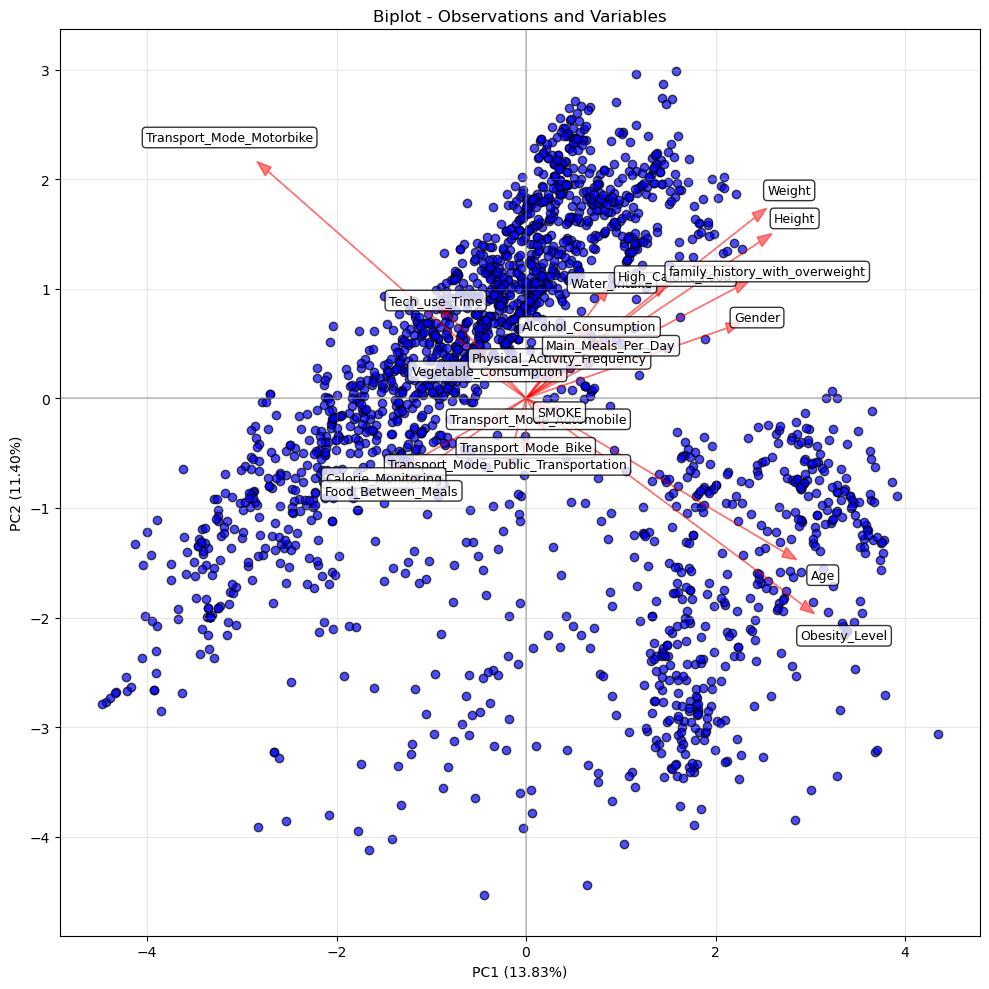

In [33]:
# ==========================
# 2) BIPLOT (OBSERVATIONS)
# ==========================
plt.figure(figsize=(10,10))
ax2 = plt.gca()

# Scatter plot of PCA scores (observations)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, color="blue", edgecolor="black")

# Add variable loading vectors on the same plot (optional)
for i in top_indices:
    x, y = loadings[i, 0] * max(X_pca[:,0]), loadings[i, 1] * max(X_pca[:,1])  # rescale loadings
    feature_name = feature_names[i]
    
   
    ax2.arrow(0, 0, x, y, color = "red", alpha=0.5, head_width=0.1)
    ax2.text(x * 1.15, y * 1.15, feature_name, fontsize=9, ha="center", va="center", color= "black",bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

ax2.set_title("Biplot - Observations and Variables")
ax2.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%})")
ax2.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%})")
ax2.axhline(0, color="gray", alpha=0.4)
ax2.axvline(0, color="gray", alpha=0.4)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()


### K-MEANS 

In [34]:
dataset_pca = pd.DataFrame(X_pca[:,:2], columns=["PC1", "PC2"])
display(dataset_pca.head())

PC1       PC2
0 -1.943402 -0.641929
1 -2.434553 -1.337080
2 -0.008624  0.977320
3  0.372038 -1.611621
4 -1.112858 -0.317927

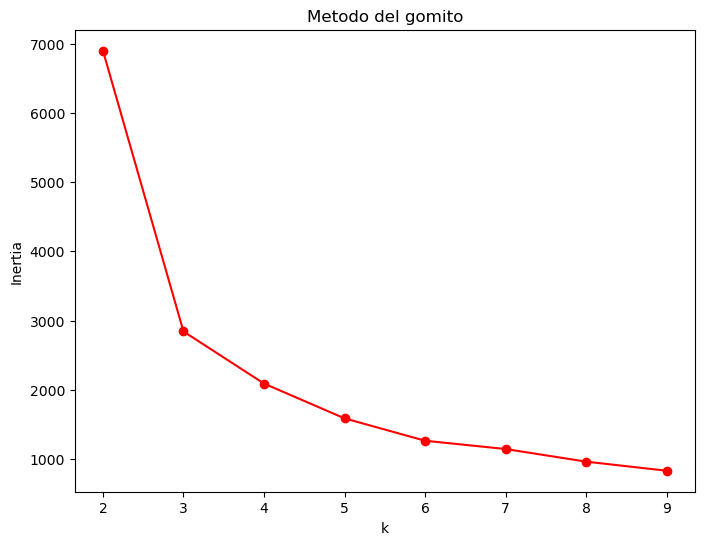

In [35]:
#METODO DEL GOMITO
inertia = []
K = range(2,10)

for k in K:
    km = KMeans(n_clusters=k, init = "k-means++", random_state=42)
    km.fit(dataset_pca)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, inertia, "ro-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Metodo del gomito")
plt.show()


In [36]:
for k in K:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    clusters = kmeans.fit_predict(dataset_pca)
    silhouette_avg = silhouette_score(dataset_pca, clusters)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.35372445076459974
For n_clusters = 3 The average silhouette_score is : 0.5302436205979832
For n_clusters = 4 The average silhouette_score is : 0.4608101377951922
For n_clusters = 5 The average silhouette_score is : 0.4490045191647829
For n_clusters = 6 The average silhouette_score is : 0.43543596601069023
For n_clusters = 7 The average silhouette_score is : 0.4245398150957592
For n_clusters = 8 The average silhouette_score is : 0.43931195017342584
For n_clusters = 9 The average silhouette_score is : 0.4158644054238449


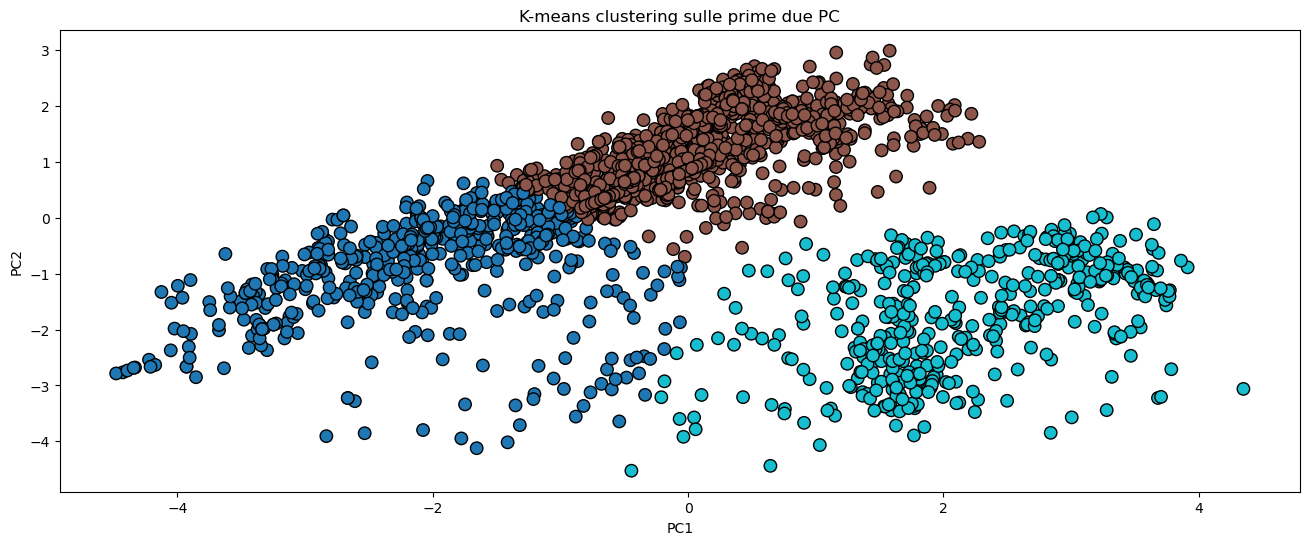

In [37]:
k = 3 # qui si forma il "gomito"

kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
clusters = kmeans.fit_predict(dataset_pca) #solo le prime due componenti

plt.figure(figsize=(16,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, s=80, cmap = "tab10", edgecolor="black", linewidth=1)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means clustering sulle prime due PC")
plt.show()

In [38]:
centroids = kmeans.cluster_centers_.T # coordinates of cluster
display(centroids)

array([[-2.02508646,  0.09187875,  2.1699429 ],
       [-0.88844728,  1.17610319, -1.75473126]])

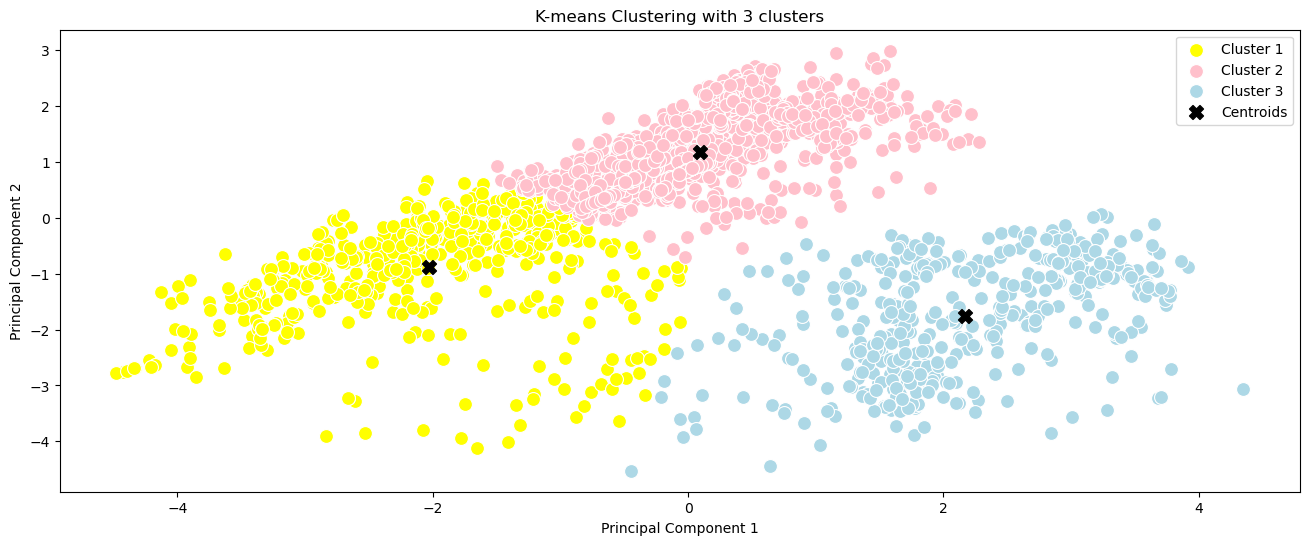

In [39]:
dataset_pca["clusters"] = clusters

colors = ["yellow", "pink", "lightblue"]

fig, ax = plt.subplots(figsize=(16, 6))

for k in range(0, 3):
    sns.scatterplot(x=dataset_pca["PC1"][dataset_pca.clusters == k], y=dataset_pca["PC2"][dataset_pca.clusters == k], color=colors[k], label="Cluster {}".format(k+1), s=100)

ax.scatter(centroids[0][:], centroids[1][:], marker="X", s=100, color="black", label="Centroids")
ax.set_title("K-means Clustering with 3 clusters")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
plt.legend()
plt.show()

In [40]:
kmeans.inertia_

2842.1908493852566

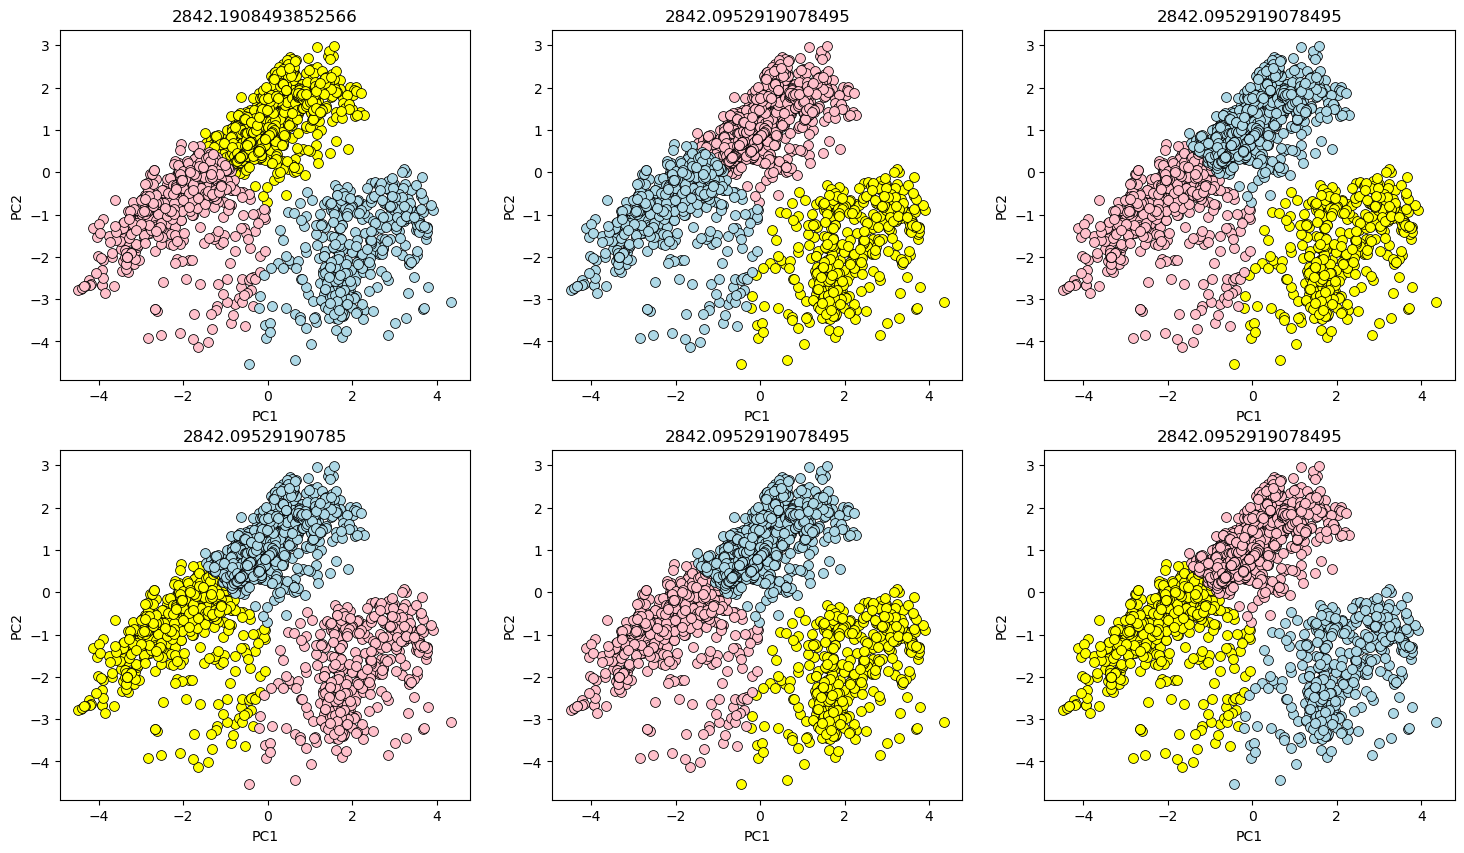

In [47]:
dataset_pca.drop(columns=["clusters"], inplace=True)
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
random_states = [15, 65, 73, 60, 10, 42]
for i in range(1, 7):
    kmeans = KMeans(n_clusters=3, n_init=1, init="random", random_state=random_states[i-1])
    kmeans.fit(dataset_pca) 
    dataset_pca["clusters"] = kmeans.labels_

    for k in range(0, 3):
        sns.scatterplot(x=dataset_pca["PC1"][dataset_pca.clusters == k], y=dataset_pca["PC2"][dataset_pca.clusters == k], color=colors[k], s=50, ax=ax[(i-1)//3, (i-1)%3],  edgecolor="black")
    
    ax[(i-1)//3, (i-1)%3].set_title(kmeans.inertia_)


plt.show()

In [45]:
dataset_clean["clusters"] = clusters
dataset_clean.groupby("clusters").mean()

Gender        Age      Height      Weight  \
clusters                                                
0         0.185792  20.888889  162.772313   59.342441   
1         0.595260  22.812215  173.027347  100.163172   
2         0.675325  31.889610  172.194805   86.831169   

          family_history_with_overweight  High_Caloric_Food  \
clusters                                                      
0                               0.464481           0.677596   
1                               0.952598           0.978122   
2                               0.913420           0.906926   

          Vegetable_Consumption  Main_Meals_Per_Day  Food_Between_Meals  \
clusters                                                                  
0                      2.386157            2.504554            1.429872   
1                      2.474932            2.747493            1.016408   
2                      2.337662            2.764069            1.088745   

             SMOKE  ...  Calorie_Monitoring  Physical_Activity_Frequency  \
clusters            ...                                                    
0         0.023679  ...            0.145719                     1.010929   
1         0.017320  ...            0.004558                     0.990884   
2         0.023810  ...            0.023810                     1.032468   

          Tech_use_Time  Alcohol_Consumption  Obesity_Level  \
clusters                                                      
0              0.732240             0.557377       1.296903   
1              0.720146             0.819508       4.047402   
2              0.458874             0.725108       3.054113   

          Transport_Mode_Automobile  Transport_Mode_Bike  \
clusters                                                   
0                          0.030965             0.001821   
1                          0.000000             0.000000   
2                          0.948052             0.012987   

          Transport_Mode_Motorbike  Transport_Mode_Public_Transportation  \
clusters                                                                   
0                         0.009107                              0.896175   
1                         0.000000                              0.989973   
2                         0.012987                              0.002165   

          Transport_Mode_Walking  
clusters                          
0                       0.061931  
1                       0.010027  
2                       0.023810  

[3 rows x 21 columns]